## Loading the dataset

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('../Database/preprocessing_data.csv')
df

,brand,dtime,atime,price,dcity,acity,flight_type,class_type,ddate,flytime_hours
0,Vietravel Airlines,23:59:00,02:15:00,1377000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.266667
1,VietJet Air,22:25:00,00:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667
2,VietJet Air,23:30:00,01:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.083333
3,VietJet Air,23:40:00,01:50:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667
4,VietJet Air,21:40:00,23:50:00,1563000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...,...
28242,Vietnam Airlines,14:45:00,07:50:00,22820000,dien-bien-phu,con-dao-island,oneway,business,2023-12-23,17.083333
28243,Vietnam Airlines,14:45:00,16:25:00,22743000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667
28244,Vietnam Airlines,14:45:00,16:25:00,23675000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667
28245,Vietnam Airlines,14:45:00,08:55:00,20757000,dien-bien-phu,Can-tho,oneway,business,2023-12-23,18.166667


chia khung thời gian ra làm các mục khác nhau
tạo 2 cột dtime_category và atime_category

In [47]:
categories = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
time_ranges = [(0, 4), (4, 8), (8, 12), (12, 16), (16, 20), (20, 24)]

def categorize_time(hour):
    for i, (start, end) in enumerate(time_ranges):
        if start <= hour < end:
            return categories[i]

df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(categorize_time)
df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(categorize_time)
df

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\3895180758.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(categorize_time)
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\3895180758.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(categorize_time)


,brand,dtime,atime,price,dcity,acity,flight_type,class_type,ddate,flytime_hours,dtime_category,atime_category
0,Vietravel Airlines,23:59:00,02:15:00,1377000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.266667,Late Night,Early Morning
1,VietJet Air,22:25:00,00:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Early Morning
2,VietJet Air,23:30:00,01:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.083333,Late Night,Early Morning
3,VietJet Air,23:40:00,01:50:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Early Morning
4,VietJet Air,21:40:00,23:50:00,1563000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...
28242,Vietnam Airlines,14:45:00,07:50:00,22820000,dien-bien-phu,con-dao-island,oneway,business,2023-12-23,17.083333,Evening,Morning
28243,Vietnam Airlines,14:45:00,16:25:00,22743000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667,Evening,Night
28244,Vietnam Airlines,14:45:00,16:25:00,23675000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667,Evening,Night
28245,Vietnam Airlines,14:45:00,08:55:00,20757000,dien-bien-phu,Can-tho,oneway,business,2023-12-23,18.166667,Evening,Afternoon


## EXPLORE DATA ANALYSIS


In [48]:
import seaborn as sns
import matplotlib.ticker as ticker

### 1. The number of flights for each brand

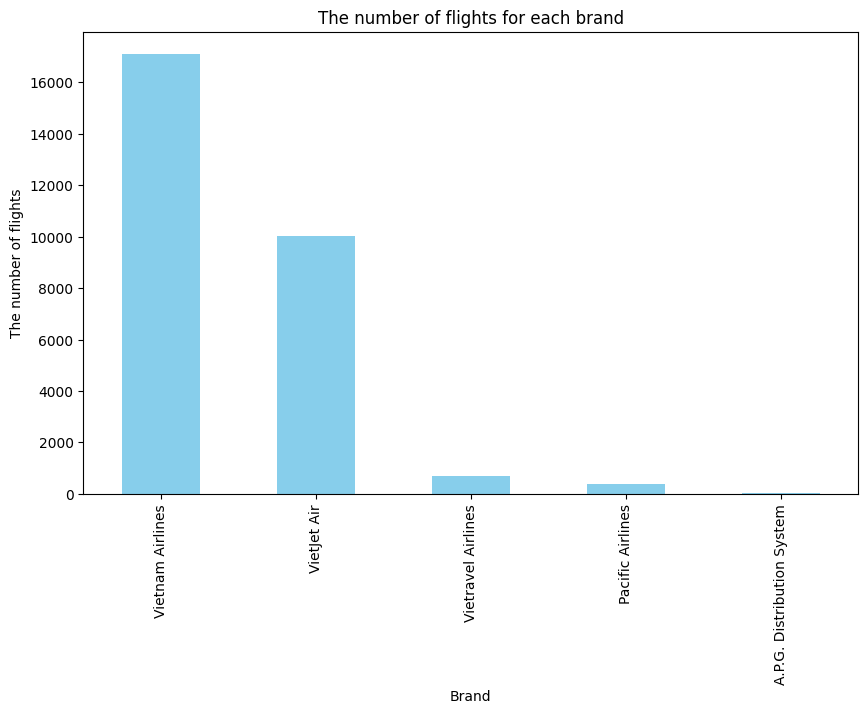

In [49]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights for each brand')
plt.xlabel('Brand')
plt.ylabel('The number of flights')
plt.show()


VN Airlines là hãng bay có nhiều chuyến bay nhất, tiếp theo đó là Vietjet Air. Ba hãng bay còn lại: Vietravel Airlines, Pacific Airlines, A.P.G Distribution System có rất ít chuyến bay, so sánh số lượng với hai brand lớn kia thì không đáng kể.

### 2. The number of flights departs from a city/ arrives to a city

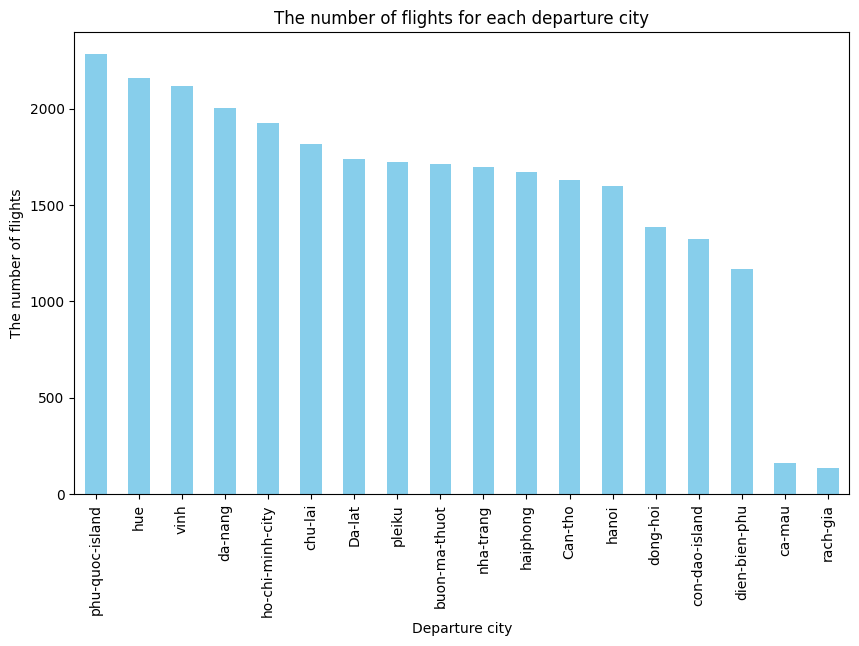

In [51]:
departure_counts = df['dcity'].value_counts()

plt.figure(figsize=(10, 6))
departure_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights for each departure city')
plt.xlabel('Departure city')
plt.ylabel('The number of flights')
plt.show()


Đảo Phú Quốc là nơi có nhiều điểm bay cất cánh xuất phát nhất, tiếp theo đó là các thành phố như Huế, Vinh, Đà Nẵng. Số lượng chuyến bay xuất phát từ các thành phố giảm dần, khác biệt với nhau không đáng kể quá nhiều. Hai thành phố có số chuyến bay đi ít nhất là Cà Mau và Rạch Giá. 

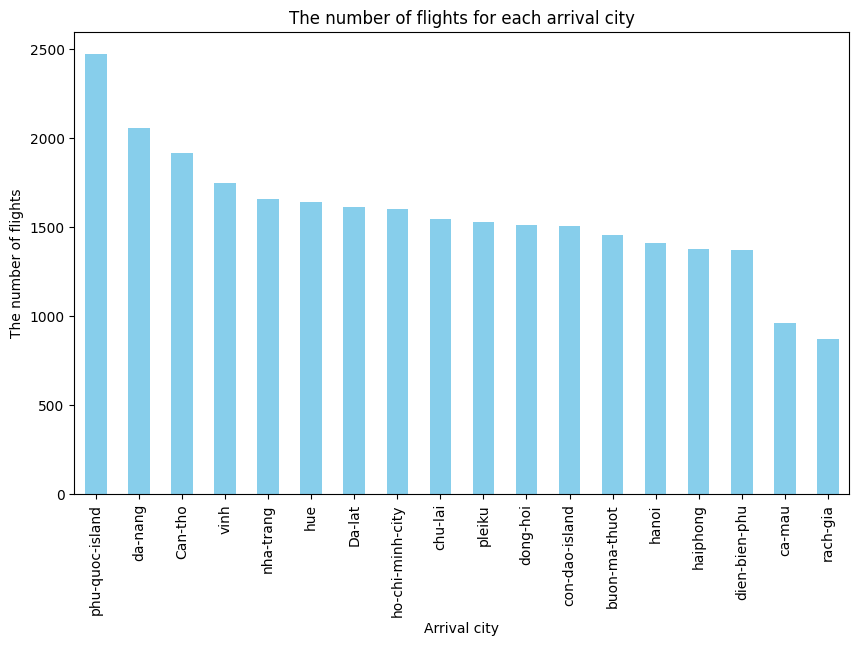

In [52]:
arrival_counts = df['acity'].value_counts()
plt.figure(figsize=(10, 6))
arrival_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights for each arrival city')
plt.xlabel('Arrival city')
plt.ylabel('The number of flights')
plt.show()


Đảo Phú Quốc cũng là điểm đến của nhiều chuyến bay nhất. Tiếp theo đó là Đà Nẵng, Cần Thơ và Vinh. Điểm đặc biệt ở đây là đây đều là các thành phố nổi tiếng về địa điểm du lịch. Đây có thể là nguyên nhân yếu tố khiến cho các thành phố này trở thành điểm đến phổ biến của các chuyến bay. Cà Mau và Rạch Giá là hai thành phố có số chuyến bay đến ít nhất. 

### 3. The number of flights for each route.

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\988221055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_routes['route'] = top_routes['dcity'] + ' -> ' + top_routes['acity']
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\988221055.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='flight_count', y='route', data=top_routes, palette='viridis')


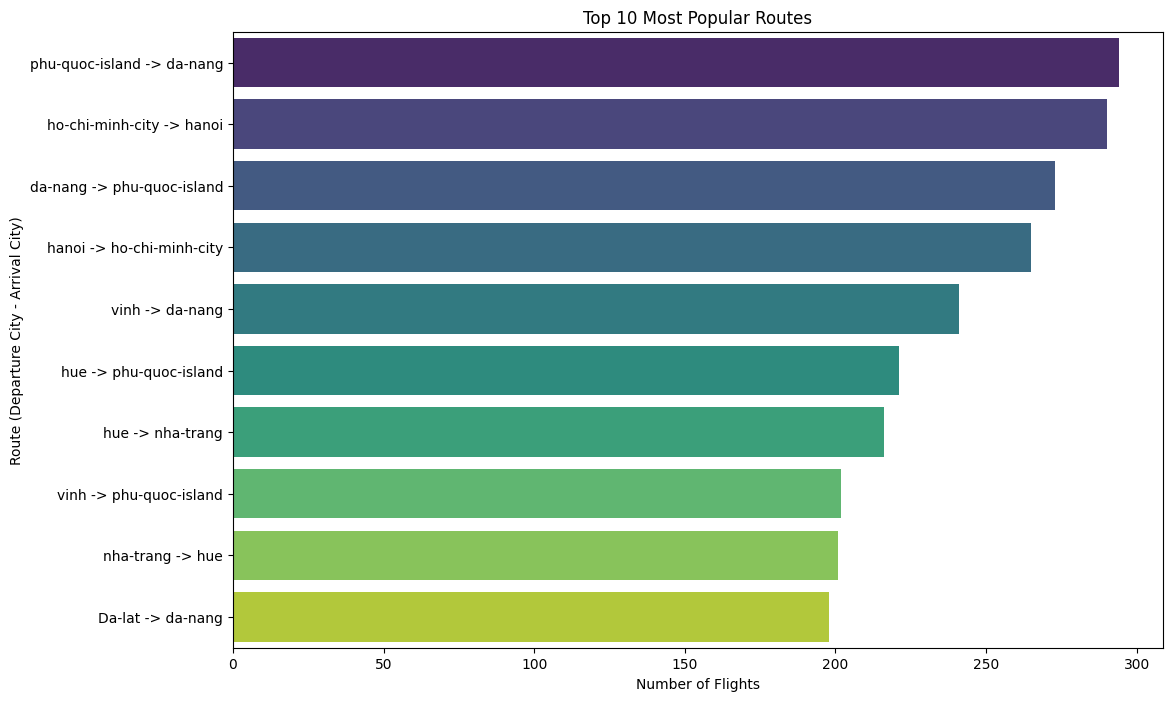

In [53]:
route_counts = df.groupby(['dcity', 'acity']).size().reset_index(name='flight_count')
route_counts = route_counts.sort_values(by='flight_count', ascending=False)

#Top 10 most popular route
top_routes = route_counts.head(10)

#create a new column called route for a pair dcity-acity
top_routes['route'] = top_routes['dcity'] + ' -> ' + top_routes['acity']

#plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='flight_count', y='route', data=top_routes, palette='viridis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Departure City - Arrival City)')
plt.show()


Hình trên hiển thị 10 chặng bay phổ biến nhất, trong đó đứng đầu là chặng bay từ Đảo Phú Quốc tới Đà Nẵng và từ Hà Nội tới HCM. Ngoài chặng bay từ HCM tới HN và từ HN tới HCM (chặng bay mang ý nghĩa di chuyển giữa hai thành phố lớn nhất của hai miền Nam Bắc) thì các chặng bay khác đều kết nối giữa hai thành phố nổi tiếng về du lịch. Có thể thấy được nhu cầu di chuyển của khách du lịch giữa các điểm du lịch lớn ở VN là vô cùng nhiều. 

### 4. The average price for a certain route with different airline brand

In [55]:
average_prices_by_brand = df.groupby(['dcity', 'acity', 'brand'])['price'].mean().reset_index()
average_prices_by_brand['route']=average_prices_by_brand['dcity']+' -> '+average_prices_by_brand['acity']
average_prices_by_brand=average_prices_by_brand.drop(['dcity','acity'],axis=1)
average_prices_by_brand

,brand,price,route
0,VietJet Air,5.505101e+06,Can-tho -> Da-lat
1,Vietnam Airlines,1.699036e+07,Can-tho -> Da-lat
2,VietJet Air,5.864757e+06,Can-tho -> buon-ma-thuot
3,Vietnam Airlines,2.336257e+07,Can-tho -> buon-ma-thuot
4,VietJet Air,7.626520e+06,Can-tho -> chu-lai
...,...,...,...
579,Vietravel Airlines,3.987837e+06,vinh -> phu-quoc-island
580,VietJet Air,3.699446e+06,vinh -> pleiku
581,Vietnam Airlines,1.562076e+07,vinh -> pleiku
582,VietJet Air,7.256024e+06,vinh -> rach-gia


In [60]:
top_routes =['phu-quoc-island -> da-nang','da-nang -> phu-quoc-island','ho-chi-minh-city -> hanoi','vinh -> da-nang'] #top 4 most popular route
selected_routes_df = average_prices_by_brand[average_prices_by_brand['route'].isin(top_routes)]
selected_routes_df


,brand,price,route
207,VietJet Air,3.747609e+06,da-nang -> phu-quoc-island
208,Vietnam Airlines,7.018462e+06,da-nang -> phu-quoc-island
209,Vietravel Airlines,5.883900e+06,da-nang -> phu-quoc-island
364,Pacific Airlines,2.236667e+06,ho-chi-minh-city -> hanoi
365,VietJet Air,2.981246e+06,ho-chi-minh-city -> hanoi
366,Vietnam Airlines,6.841293e+06,ho-chi-minh-city -> hanoi
367,Vietravel Airlines,1.377000e+06,ho-chi-minh-city -> hanoi
464,Pacific Airlines,3.234558e+06,phu-quoc-island -> da-nang
465,VietJet Air,4.159549e+06,phu-quoc-island -> da-nang
466,Vietnam Airlines,7.344153e+06,phu-quoc-island -> da-nang


C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\2222957793.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='route', y='price', hue='brand', data=selected_routes_df, ci=None,palette = 'Set2')


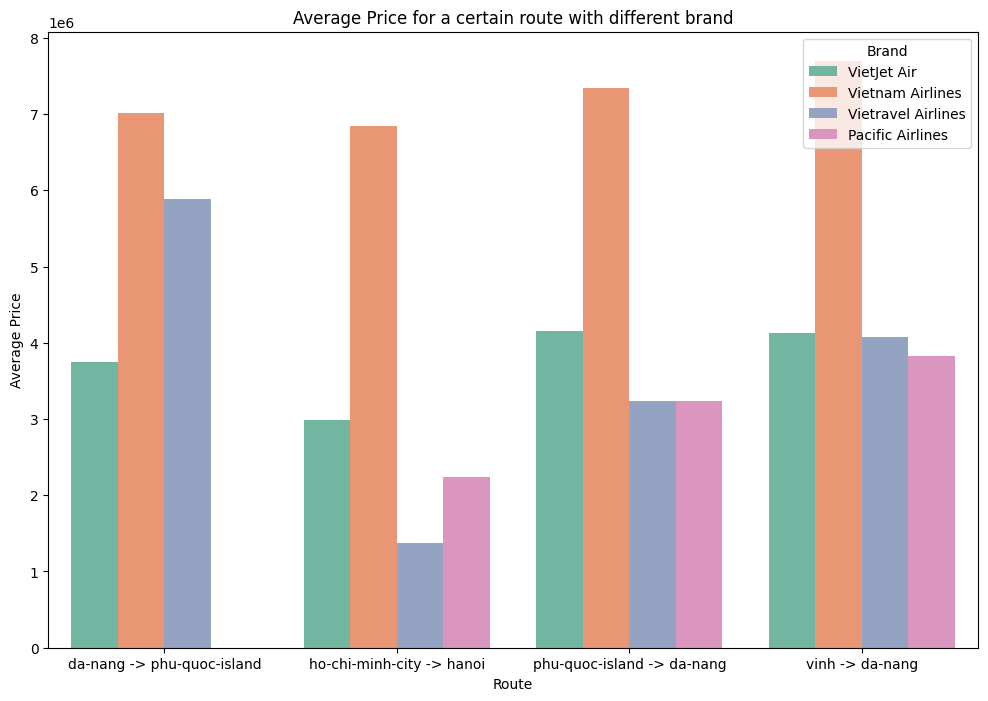

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x='route', y='price', hue='brand', data=selected_routes_df, ci=None,palette = 'Set2')

plt.title('Average Price for a certain route with different brand')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.legend(title='Brand', loc='upper right')

plt.show()

Như ở bên trên đã thống kê thì Vietnam Airlines và Vietjet là hai brand có số lượng chuyến bay là nhiều nhất, tuy nhiên giá cả trung bình trên một lộ trình bay
của Vietnam Airlines so với các brand khác thì lớn hơn hẳn. Còn giá cả của Vietjet thì thuộc dạng giá rẻ, sấp sỉ bằng với hai hãng Vietravel Airlines và Pacific Airlines. 

### 5. The number of flights departs at a time period/ arrives at a time period

Như ở phần load dataset, dữ liệu về thời gian cất cánh/ hạ cánh đã được tạo thêm hai cột để phân loại khoảng thời gian cất cánh/ hạ cánh. Giờ cta sẽ dựa vào đấy để thống kê
số lượng chuyến bay thường được cất cánh/ hạ cánh vào khung giờ nào là nhiều nhất/ ít nhất.

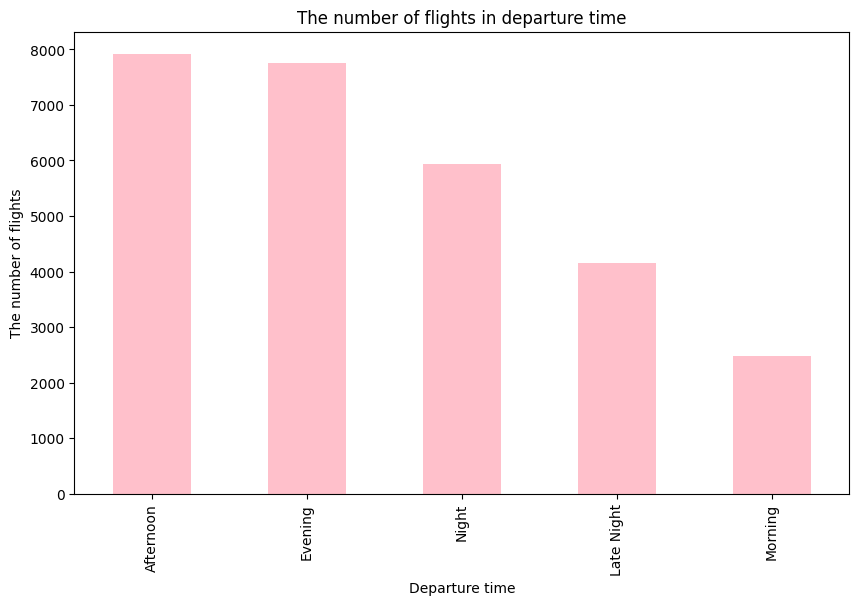

In [67]:
dtime_category_counts = df['dtime_category'].value_counts()

plt.figure(figsize=(10, 6))
dtime_category_counts.plot(kind='bar', color='pink')
plt.title('The number of flights in departure time')
plt.xlabel('Departure time')
plt.ylabel('The number of flights')
plt.show()


Hầu hết các chuyến bay đều ưu tiên khoảng thời gian cất cánh là buổi chiều hoặc buổi tối. Đây là khoảng thời gian tiện lợi cho việc khởi hành. Các chuyến bay khởi hành vào buổi sáng là ít nhất.

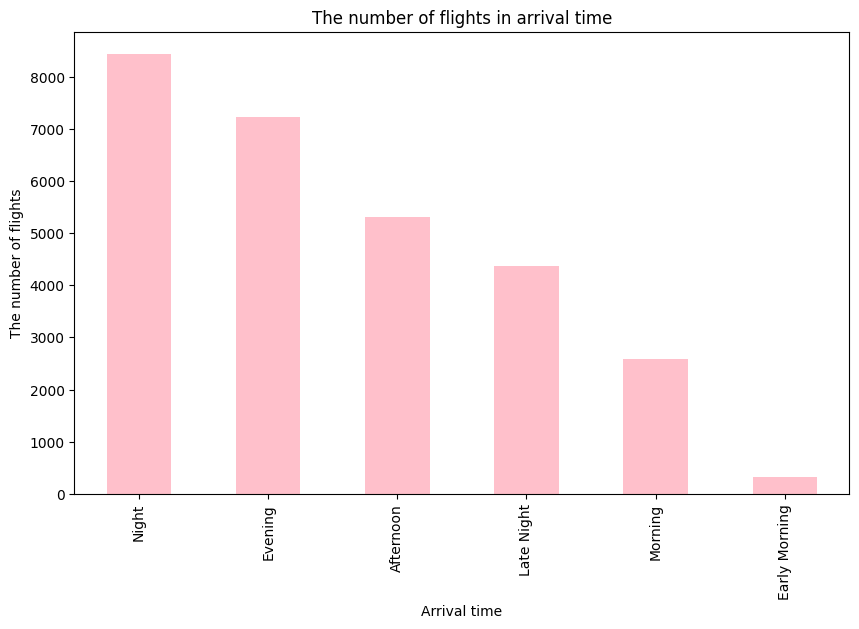

In [68]:
atime_category_counts = df['atime_category'].value_counts()

plt.figure(figsize=(10, 6))
atime_category_counts.plot(kind='bar', color='pink')
plt.title('The number of flights in arrival time')
plt.xlabel('Arrival time')
plt.ylabel('The number of flights')
plt.show()


Các chuyến bay hạ cánh vào khoảng thời gian buổi tối là nhiều nhất, sau đó là buổi chiều. Các chuyến bay hạ cánh vào sáng sớm hay buổi sáng là ít phổ biến nhất.

### 6. The affect of time period on price

Thống kê và so sánh xem cùng một chuyến bay bất kì nhưng do khác biệt về thời gian cất cánh/ hạ cánh thì sẽ ảnh hưởng tới giá cả như thế nào. 

In [77]:
dcity_acity_counts = df.groupby(['dcity', 'acity'])['dtime_category'].nunique().reset_index(name='count')
filtered_dtime_category_data = dcity_acity_counts[dcity_acity_counts['count'] == 5]
filtered_dtime_category_data

,dcity,acity,count
0,Can-tho,Da-lat,5
1,Can-tho,buon-ma-thuot,5
4,Can-tho,da-nang,5
8,Can-tho,hanoi,5
15,Da-lat,Can-tho,5
18,Da-lat,chu-lai,5
36,buon-ma-thuot,da-nang,5
39,buon-ma-thuot,haiphong,5
99,da-nang,con-dao-island,5
103,da-nang,hanoi,5


C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\754039896.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dtime_category', y='price', data=selected_data, ci=None,color='skyblue')


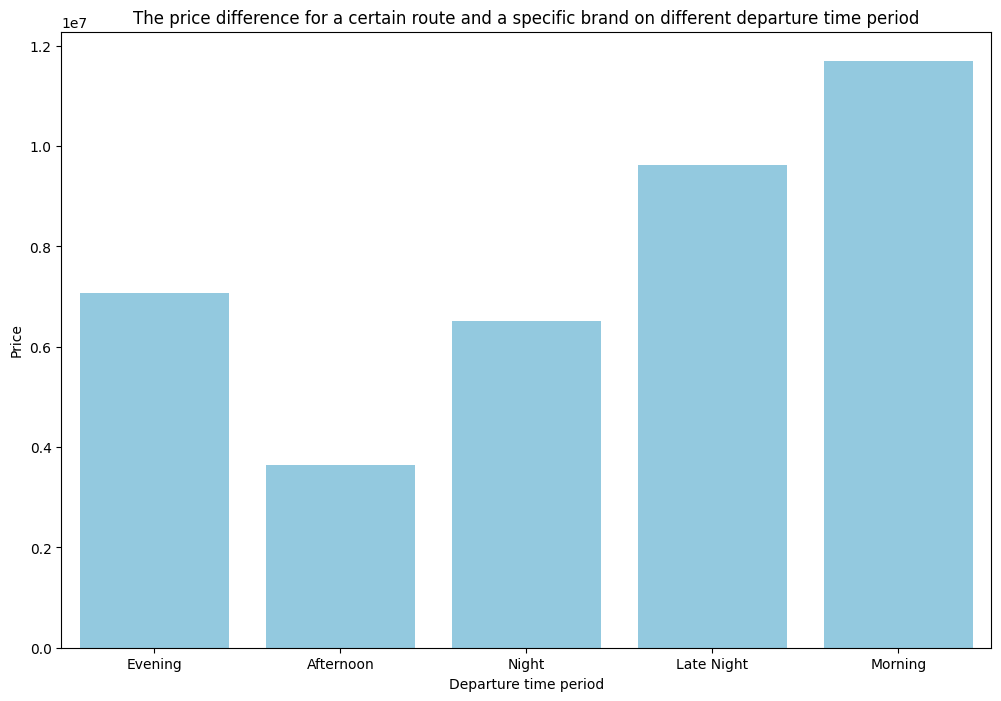

In [82]:
df['route'] = df['dcity'] + ' -> ' + df['acity']


selected_data = df[(df['brand'] == 'Vietnam Airlines') & (df['dcity'] == 'ho-chi-minh-city') & (df['acity']=='hue')]

plt.figure(figsize=(12, 8))
sns.barplot(x='dtime_category', y='price', data=selected_data, ci=None,color='skyblue')

plt.title('The price difference for a certain route and a specific brand on different departure time period')
plt.xlabel('Departure time period')
plt.ylabel('Price')
plt.ylim(0) 

plt.show()

Bên trên thống kê số chuyến bay cất cánh vào buổi chiều, buổi tối là nhiều nhất, còn cất cánh vào buổi sáng là ít nhất. Có thể nhìn thấy được sự ảnh hưởng lên giá cả bởi những chuyến bay có cùng lộ trình bay, của cùng một hãng hàng không thì giá cả nếu cất cánh vào buổi sáng sẽ là mắc nhất, còn giá cả vào buổi chiều, buổi tối sẽ là rẻ nhất. 

In [83]:
dcity_acity_counts_2 = df.groupby(['dcity', 'acity'])['atime_category'].nunique().reset_index(name='count')
filtered_atime_category_data = dcity_acity_counts_2[dcity_acity_counts_2['count'] == 5]
filtered_atime_category_data

,dcity,acity,count
7,Can-tho,haiphong,5
8,Can-tho,hanoi,5
23,Da-lat,haiphong,5
25,Da-lat,ho-chi-minh-city,5
30,Da-lat,vinh,5
36,buon-ma-thuot,da-nang,5
39,buon-ma-thuot,haiphong,5
103,da-nang,hanoi,5
109,da-nang,vinh,5
153,haiphong,ho-chi-minh-city,5


In [ ]:
selected_data_2 = df[(df['brand'] == 'Vietnam Airlines') & (df['dcity'] == 'ho-chi-minh-city') & (df['acity']=='hue')]

plt.figure(figsize=(12, 8))
sns.barplot(x='atime_category', y='price', data=selected_data_2, ci=None,color='skyblue')

plt.title('The price difference for a certain route and a specific brand on different arrival time period')
plt.xlabel('Arrival time period')
plt.ylabel('Price')
plt.ylim(0) 

plt.show()

In [42]:
def dist_box_plot(df, col):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True)
    plt.ticklabel_format(style='plain', axis='x')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\1306819144.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\1306819144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette='Set2')


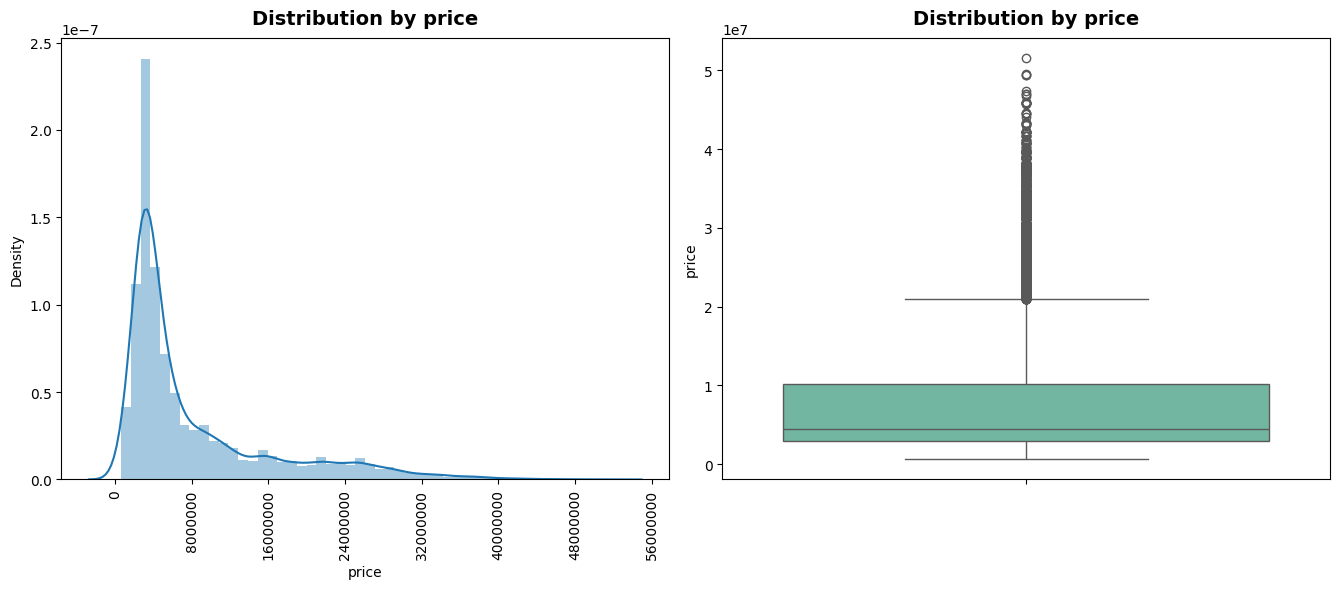

In [43]:
dist_box_plot(df, 'price')

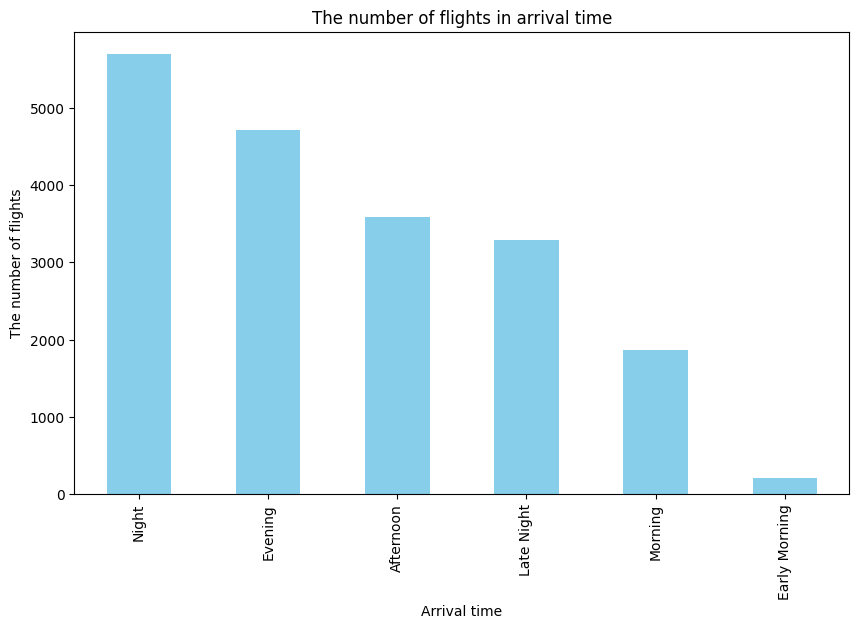

In [18]:
atime_category_counts = df['atime_category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
atime_category_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights in arrival time')
plt.xlabel('Arrival time')
plt.ylabel('The number of flights')
plt.show()


In [ ]:
Kết luận: Các chuyến bay khởi hành vào buổi tối nhiều nhất, khởi hành vào sáng sớm ít nhất. 